<a href="https://colab.research.google.com/github/tamasane/colab_notebooks/blob/master/dsp_sound_source_separation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sound Source Separation

Analog/Digital acoustic data is available in time domain. The acoustic data is a mix of multiple acoustic sources. The issue at hand is to segregate and clip out data of specific acoustic sources. The segregated clipped out data to be made available in form of audio files for end user. Fundamental frequencies of various acoustic sources are known. 


### Installing Libraries

In [ ]:
!pip install thinkx sounddevice scipy numpy

### Generating Dummy Audio Files

In [2]:
from thinkdsp import CosSignal, SinSignal

In [3]:
cos_sig = CosSignal(freq=661, amp=0.34, offset=0)                # Signal Source 1
sin_sig = SinSignal(freq=1381, amp=1.0, offset=0)                # Signal Source 2

In [4]:
mix = cos_sig + sin_sig                                          # Combined Signal

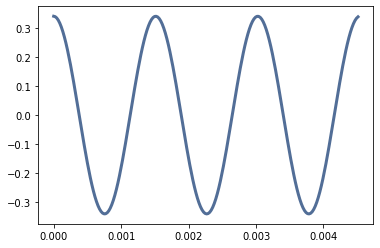

In [5]:
cos_sig.plot(framerate=44100)                                    # Visualizing Cos Signal

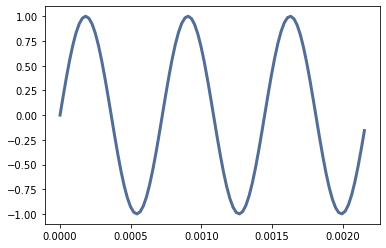

In [6]:
sin_sig.plot(framerate = 44100)                                    # Visualizing Sin Signal

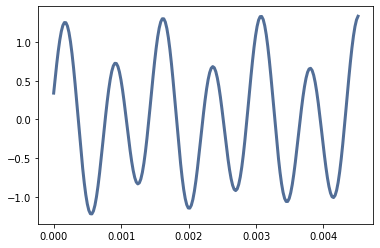

In [7]:
mix.plot(framerate = 44100)                                        # Visualizing Combined Mix Signal

In [8]:
# Encoding signals as wav(uncompressed) audio 
cos_audio = cos_sig.make_wave(duration=1.0, framerate=44100)
sin_audio = sin_sig.make_wave(duration=1.0, framerate=44100)
mix_audio = mix.make_wave(duration=1.0, framerate=44100)

In [9]:
cos_audio.make_audio()                             # Audio from source 1

In [10]:
sin_audio.make_audio()                            # Audio from source 2

In [11]:
mix_audio.make_audio()                            # Audio from combined signal

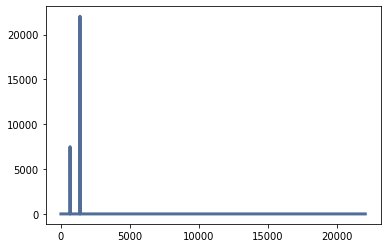

In [12]:
(mix_audio.make_spectrum()).plot()                # Spectrum graph for mixed signal (X represents Frequency, Y represents amplitude {Y scale is not correct})

In [13]:
# Saving the encodings as files for later use
mix_audio.write('mix_audio.wav')
sin_audio.write('sin_audio.wav')
cos_audio.write('cos_audio.wav')

Writing mix_audio.wav
Writing sin_audio.wav
Writing cos_audio.wav


/usr/local/lib/python3.6/dist-packages/thinkdsp.py:1115: UserWarning: Warning: normalizing before quantizing.
  warnings.warn('Warning: normalizing before quantizing.')


### Sound Source Separation using FFT

In [14]:
from scipy.io import wavfile
from scipy.fftpack import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [15]:
# Read the audio file
fs, mix_data = wavfile.read('mix_audio.wav')

In [16]:
# Known Fundamental Frequencies
f0_1 = 661
f0_2 = 1381

In [17]:
# Applying FFT
fft_data = np.fft.fft(mix_data)

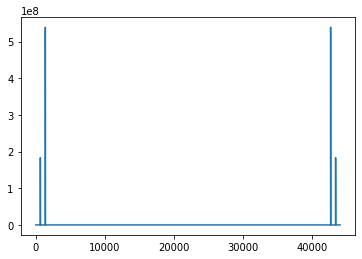

In [18]:
# Plotting the FFT magnitude (spectrum graph symmetric about centre)
plt.plot(np.abs(fft_data))

In [19]:
def filter_freq(lower, higher, fft_data):
    '''
    This function acts as band pass filter and returns the fft_data with frequencies
    in the range from lower to higher (both inclusive).
    '''
    filtered = fft_data.copy()
    for i in range(len(filtered)//2):
        if i<lower or i>higher:
            filtered[i]  = 0            # make f(k) component zero
            filtered[-i] = 0            # make f(n-k) component zero
    return filtered

In [20]:
def get_audio(fft_data):
    '''
    This function encodes the fft_data back into audio format. Applies IFFT.
    '''
    return np.real(np.fft.ifft(fft_data)).astype(np.int16)

In [21]:
## RUN THIS BLOCK TO PLAY FILTERED SIGNAL 1
# Play Source 1 
# 1. Filter Mixed Signal at Fundamental Frequency f0_1.
source_1_fft = filter_freq(f0_1, f0_1, fft_data)

#2. Get Audio encoding.
audio_1 = get_audio(source_1_fft)

#3. Play the Audio.
ipd.Audio(audio_1, rate=fs)

# Result -> Sounds very similar to Cos Audio in code block 9

In [22]:
## RUN THIS BLOCK TO PLAY FILTERED SIGNAL 2
# Play Source 2
# 1. Filter Mixed Signal at Fundamental Frequency f0_2.
source_2_fft = filter_freq(f0_2, f0_2, fft_data)

#2. Get Audio encoding.
audio_2 = get_audio(source_2_fft)

#3. Play the Audio.
ipd.Audio(audio_2, rate=fs)

# Result -> Sounds very similar to Sin Audio in code block 10

## Investigating the results.

In [23]:
fs_1, orig_audio_1 = wavfile.read('cos_audio.wav')     # Reading the original audio_1 i.e.  661 Hz wave file
fs_2, orig_audio_2 = wavfile.read('sin_audio.wav')     # Reading the original audio_2 i.e. 1381 Hz wave file

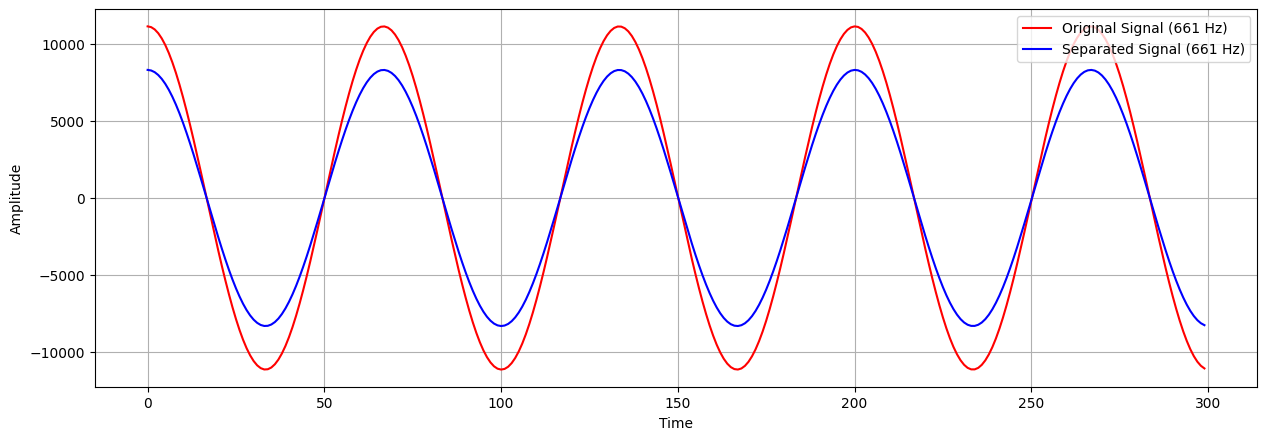

In [24]:
# Lets plot 300 samples from original, separated and the mixed signals.

plt.figure(num=None, figsize=(15, 5), dpi=100, facecolor='w', edgecolor='k')
plt.plot(orig_audio_1[:300], 'red', label='Original Signal (661 Hz)')
plt.plot(audio_1[:300], 'blue', label='Separated Signal (661 Hz)')
plt.ylabel("Amplitude")
plt.xlabel("Time")
plt.grid(True)
plt.legend(loc=1)
plt.show()

### Conclusion
The separated signals sound very similar to the original ones to the human ear. But they differ from the original source signals as seen here. As we see each cycle of the seperated signal (blue) and the original source signal (red) is perfectly aligned which indicates that we successfully extracted the fundamental frequency from the mixed signal. The difference occurs only in terms of amplitude which we have not handled in the filtering step and can be easily taken care of by scaling the values. However the sound effect produced by both the waves will be same as amplitude affects only the volume of sound.